In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('merged_all_no_norm.csv', keep_default_na=False, na_values=[''])
data["length"] = data["peptide"].apply(len)
data

,peptide,ap,is_assembled,hydrophobic_moment,has_beta_sheet_content,net_charge,length
0,AAA,1.041021,0.0,NaN,NaN,NaN,3
1,AAAA,1.062640,0.0,NaN,NaN,NaN,4
2,AAAAA,1.090202,0.0,NaN,NaN,NaN,5
3,AAAAAA,1.453839,0.0,NaN,NaN,NaN,6
4,AAAAAAA,1.440201,0.0,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...
161115,YYYYYWY,1.950630,1.0,NaN,NaN,NaN,7
161116,YYYYYY,2.036407,1.0,NaN,NaN,NaN,6
161117,YYYYYYF,2.006736,1.0,NaN,NaN,NaN,7
161118,YYYYYYW,1.891694,1.0,NaN,NaN,NaN,7


In [2]:
beyond = pd.read_csv('beyond_tri.txt', sep=' ', header=None)
beyond

,0,1
0,ALA-ALA,1.032729
1,ALA-ALA-ALA,1.041021
2,ALA-ALA-ALA-ALA,1.062640
3,ALA-ALA-ALA-ALA-ALA,1.090202
4,ALA-ALA-ALA-ALA-ALA-ALA,1.453839
...,...,...
59931,VAL-VAL-VAL-VAL-VAL-PRO-PHE,2.080066
59932,VAL-VAL-VAL-VAL-VAL-VAL,2.143019
59933,VAL-VAL-VAL-VAL-VAL-VAL-PHE,2.131534
59934,VAL-VAL-VAL-VAL-VAL-VAL-VAL,2.144234


In [3]:
beyond[0]

0                                ALA-ALA
1                            ALA-ALA-ALA
2                        ALA-ALA-ALA-ALA
3                    ALA-ALA-ALA-ALA-ALA
4                ALA-ALA-ALA-ALA-ALA-ALA
                      ...               
59931        VAL-VAL-VAL-VAL-VAL-PRO-PHE
59932            VAL-VAL-VAL-VAL-VAL-VAL
59933        VAL-VAL-VAL-VAL-VAL-VAL-PHE
59934        VAL-VAL-VAL-VAL-VAL-VAL-VAL
59935    VAL-VAL-VAL-VAL-VAL-VAL-VAL-VAL
Name: 0, Length: 59936, dtype: object

In [4]:
amino_acid_dict = {
    'A': 'Ala', 'C': 'Cys', 'D': 'Asp', 'E': 'Glu', 'F': 'Phe', 'G': 'Gly',
    'H': 'Hse', 'I': 'Ile', 'K': 'Lys', 'L': 'Leu', 'M': 'Met', 'N': 'Asn',
    'P': 'Pro', 'Q': 'Gln', 'R': 'Arg', 'S': 'Ser', 'T': 'Thr', 'V': 'Val',
    'W': 'Trp', 'Y': 'Tyr'
}

# invert the dictionary for reverse lookup
amino_acid_dict_inv = {v.upper(): k for k, v in amino_acid_dict.items()}

def convert_to_1_letter(peptide):
    return ''.join([amino_acid_dict_inv[aa] for aa in peptide.split('-')])

beyond['peptide'] = beyond[0].apply(convert_to_1_letter)
beyond.rename(columns={1: 'ap_beyond'}, inplace=True)
beyond.drop(columns=[0], inplace=True)
beyond

,ap_beyond,peptide
0,1.032729,AA
1,1.041021,AAA
2,1.062640,AAAA
3,1.090202,AAAAA
4,1.453839,AAAAAA
...,...,...
59931,2.080066,VVVVVPF
59932,2.143019,VVVVVV
59933,2.131534,VVVVVVF
59934,2.144234,VVVVVVV


<Axes: xlabel='len'>

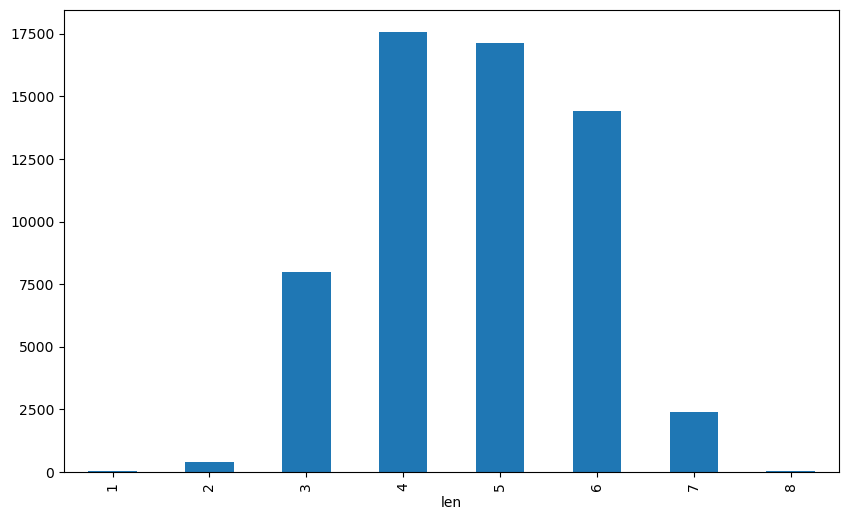

In [5]:
beyond['len'] = beyond['peptide'].apply(len)
beyond['len'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

In [6]:
merged_aps = pd.read_csv('merged_aps.csv')
merged_aps

,peptide,ap,len
0,EADPN,0.999,5
1,DADPA,1.001,5
2,DNPEI,1.001,5
3,DDPMD,1.004,5
4,EQDLP,1.005,5
...,...,...,...
62154,ILCSAVLYWW,2.280,10
62155,WCWHPWIWIW,2.280,10
62156,YFAMVFYFRF,2.282,10
62157,LMWQYFAYYF,2.313,10


In [7]:
# generate a new df with merged peptides that are both in data and beyond
merged_peptides = pd.merge(merged_aps, beyond[['peptide', 'ap_beyond']], on='peptide', how='inner')
merged_peptides = merged_peptides[merged_peptides['len'] > 3]
merged_peptides

,peptide,ap,len,ap_beyond
0,EQLNN,1.099,5,1.180018
1,ACNGG,1.350,5,1.502008
2,TTKRA,1.471,5,1.329033
3,EVQRT,1.547,5,1.571151
4,MNKTC,1.596,5,1.481488
5,CDWDM,1.702,5,1.550543
6,KENST,1.787,5,1.718219
7,IYHGR,1.842,5,1.747162
8,HFGDI,1.851,5,1.840178
9,GTYCD,1.865,5,1.686726


In [10]:
(merged_peptides['ap_beyond'] - merged_peptides['ap']).describe()

count    56.000000
mean     -0.089611
std       0.136712
min      -0.394731
25%      -0.180461
50%      -0.094601
75%       0.013427
max       0.176167
dtype: float64

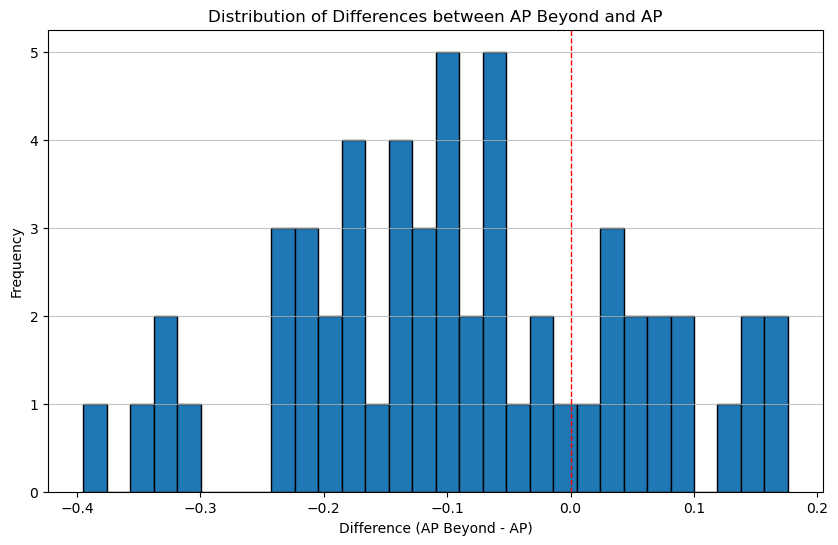

In [8]:
# plot the distribution of differences between ap_beyond and ap
plt.figure(figsize=(10, 6))
plt.hist(merged_peptides['ap_beyond'] - merged_peptides['ap'], bins=30, edgecolor='black')
plt.title('Distribution of Differences between AP Beyond and AP')
plt.xlabel('Difference (AP Beyond - AP)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()

In [47]:
# show length distribution
data['length'].describe()

count    110116.000000
mean          7.207481
std           2.073443
min           2.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          10.000000
Name: length, dtype: float64

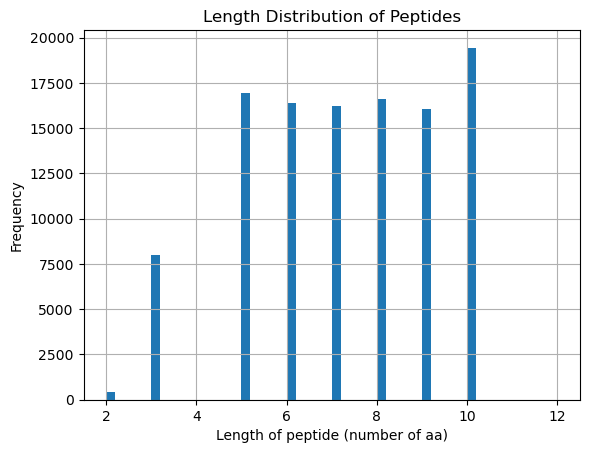

In [5]:
# show length distribution in a histogram
data['length'].hist(bins=50)
plt.xlabel('Length of peptide (number of aa)')
plt.ylabel('Frequency')
plt.title('Length Distribution of Peptides')
plt.show()

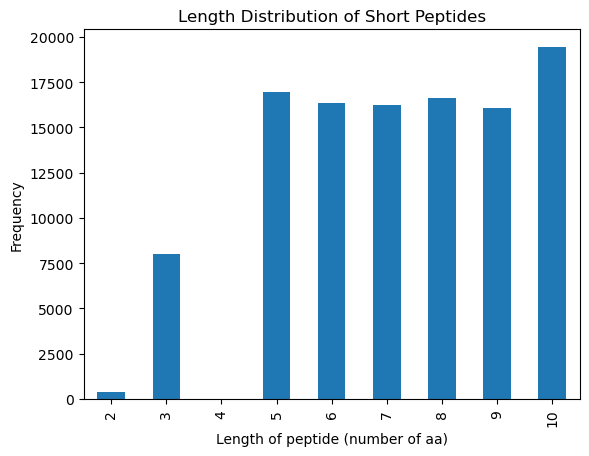

In [14]:
data['length'][data['length'] < 11].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Length of peptide (number of aa)')
plt.ylabel('Frequency')
plt.title('Length Distribution of Short Peptides')
plt.show()